In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
housing.target_names

['MedHouseVal']

In [6]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Train Test Spliting

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(housing.data, housing.target,test_size=0.25, random_state=42)

In [9]:
x_train.shape

(15480, 8)

In [10]:
x_test.shape

(5160, 8)

In [11]:
x_train,x_valid, y_train,y_valid = train_test_split(x_train,y_train, random_state=42)

In [12]:
x_train.shape

(11610, 8)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
np.random.seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [15]:
model = Sequential()
model.add(Dense(units=30, activation='relu', input_shape=[8] ))

model.add(Dense(units=30, activation='relu',))

model.add(Dense(1))

In [16]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.evaluate(x_train,y_train)

363/363 [==============================] - 1s 725us/step - loss: 7.2426 - mae: 2.4278


[7.178591251373291, 2.4153199195861816]

In [19]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 765us/step - loss: 7.0685 - mae: 2.3906


[7.068546295166016, 2.3905813694000244]

In [20]:
model_history = model.fit(x_train,y_train, epochs=100, validation_data=(x_valid,y_valid))

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - 

363/363 [==============================] - 0s 1ms/step - loss: 0.3451 - mae: 0.4157 - val_loss: 0.3451 - val_mae: 0.4068
Epoch 63/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3441 - mae: 0.4146 - val_loss: 0.3341 - val_mae: 0.4083
Epoch 64/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3440 - mae: 0.4148 - val_loss: 0.3251 - val_mae: 0.4044
Epoch 65/100
363/363 [==============================] - 0s 985us/step - loss: 0.3433 - mae: 0.4145 - val_loss: 0.3380 - val_mae: 0.4051
Epoch 66/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3429 - mae: 0.4137 - val_loss: 0.3288 - val_mae: 0.4039
Epoch 67/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3421 - mae: 0.4131 - val_loss: 0.3591 - val_mae: 0.4090
Epoch 68/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3419 - mae: 0.4133 - val_loss: 0.3313 - val_mae: 0.4037
Epoch 69/100
363/363 [==============================] - 0s 1ms/step - los

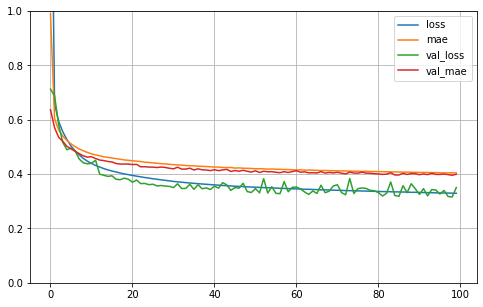

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506,
  0.39491623640060425,
  0.392380952835083,
  0.3898072838783264,
  0.3874099850654602,
  0.38507524132728577,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769364356994629,
  0.37497687339782715,
  0.37299543619155884,
  0.3713502883911133,
  0.37013334035873413,
  0.36850523948669434,
  0.3672060966491699,
  0.3659689128398895,
  0.3646579086780548,
  0.36356648802757263,
  0.36240413784980774,
  0.3612900972366333,
  0.3601578176021576,
  0.3593333661556244,
  0.3579859733581543,
  0.3572615683078766,
  0.356403

In [23]:
weight, bais = model.layers[1].get_weights()

In [24]:
weight

array([[-7.50301033e-03, -4.89409678e-02,  2.61113346e-01,
        -1.62762627e-01,  1.13849893e-01,  2.37052113e-01,
         3.10174614e-01,  1.43922657e-01, -9.08093005e-02,
        -6.53532194e-03, -1.52301267e-01,  1.70805871e-01,
        -3.47758144e-01,  4.97494899e-02,  1.14952996e-01,
         2.51645178e-01, -7.33853951e-02, -3.18447888e-01,
        -2.33075935e-02,  1.26472920e-01, -2.36539558e-01,
        -2.50504673e-01, -8.29447657e-02,  2.80172229e-01,
         2.62939483e-01, -4.44736406e-02,  5.88929504e-02,
         1.92602858e-01,  2.71106005e-01,  2.37138420e-01],
       [-2.01598346e-01, -3.17206234e-03, -3.11383791e-02,
         1.09145805e-01,  2.08689749e-01,  2.36109495e-01,
        -9.50628519e-02,  2.53286809e-01, -3.74928256e-03,
        -3.87352565e-03, -7.18986690e-02,  7.26531306e-03,
        -1.87703580e-01, -2.05135569e-01,  3.48555058e-01,
        -2.77132213e-01, -1.08014084e-02,  4.33215410e-01,
        -3.50059234e-02,  3.64483476e-01, -1.47278145e-

In [25]:
bais

array([ 0.14701997, -0.04740317, -0.03731012, -0.06890576,  0.08764237,
        0.02845123, -0.2523619 ,  0.01055843, -0.11860264,  0.07188362,
        0.00825591, -0.25726625,  0.04522663,  0.00676403,  0.06513945,
        0.0169288 ,  0.03248824,  0.15727638, -0.04962334,  0.11345792,
        0.07984371,  0.13392678,  0.21571726, -0.01318087, -0.01024592,
        0.28615442,  0.09211917, -0.12743819, -0.06696205, -0.04340969],
      dtype=float32)

In [29]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 363}

In [31]:
model_history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]